<a href="https://colab.research.google.com/github/Manar-Hamed/Arabic_Sign_Language/blob/main/Image_Text_Speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# # Mounting Drive
# from google.colab import drive
# drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
# Unziping the Images file
# !unzip data\ArASL_Database_54K_Final.zip -d data
# !tar -xf data\ArASL_Database_54K_Final.zip


^C


In [19]:
# !pip install scikit-learn
# !pip install matplotlib
# !pip install opencv-python

     ---------------------------------------- 7.2/7.2 MB 3.7 MB/s eta 0:00:00
     -------------------------------------- 965.4/965.4 KB 3.4 MB/s eta 0:00:00
     -------------------------------------- 163.6/163.6 KB 2.4 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\user\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [20]:
# Importing required libraries

# from sklearn.preprocessing import LabelBinarizer
from keras.metrics import Precision, Recall, Accuracy
from sklearn.model_selection import train_test_split
from keras.models import load_model
from keras.utils import plot_model
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import numpy as np
import pandas as pd
# import pickle
# import random
import shutil
# import math
import cv2
import os


In [24]:
%matplotlib inline

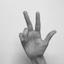

In [29]:
# Visualizing an Image
img = tf.keras.preprocessing.image.load_img(r'data\ArASL_Database_54K_Final\ArASL_Database_54K_Final\al\AL (1).JPG')
img

In [30]:
cv2.imread(r'data\ArASL_Database_54K_Final\ArASL_Database_54K_Final\al\AL (1).JPG').shape

(64, 64, 3)

In [31]:
img.size

(64, 64)

### Loading Images

In [65]:
# Loading images
data = tf.keras.utils.image_dataset_from_directory('data\ArASL_Database_54K_Final\ArASL_Database_54K_Final')

Found 54049 files belonging to 32 classes.


In [66]:
data_iterator = data.as_numpy_iterator()

In [67]:
batch = data_iterator.next()

In [68]:
batch[0].shape

(32, 256, 256, 3)

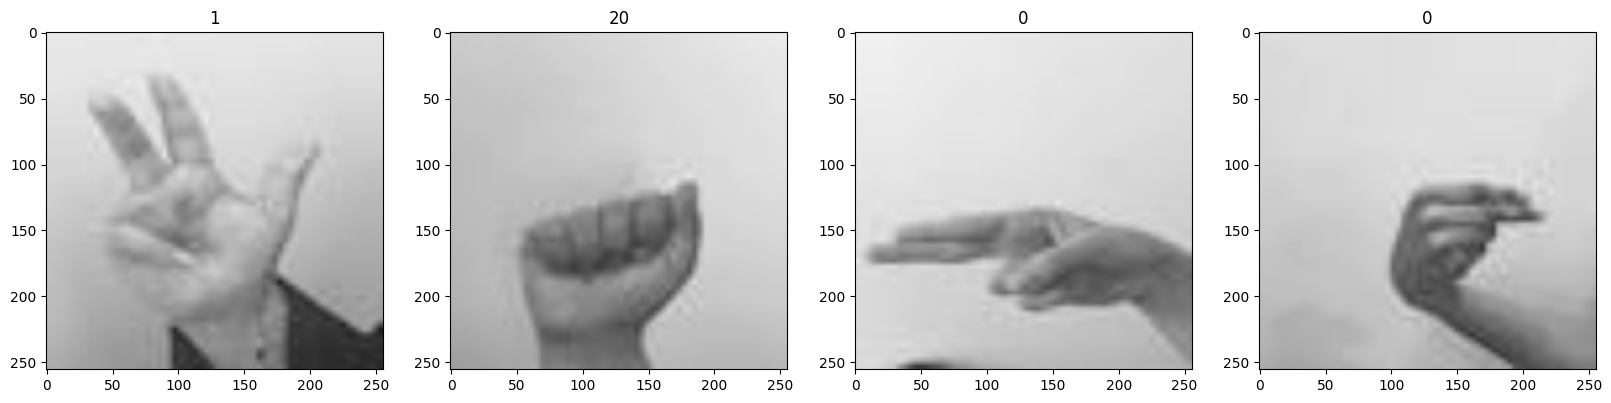

In [69]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

### Scaling Data

In [70]:
# Scale Data
data = data.map(lambda x,y: (x/255, y))

In [71]:
scaled_itertor = data.as_numpy_iterator()

In [72]:
batch = scaled_itertor.next()

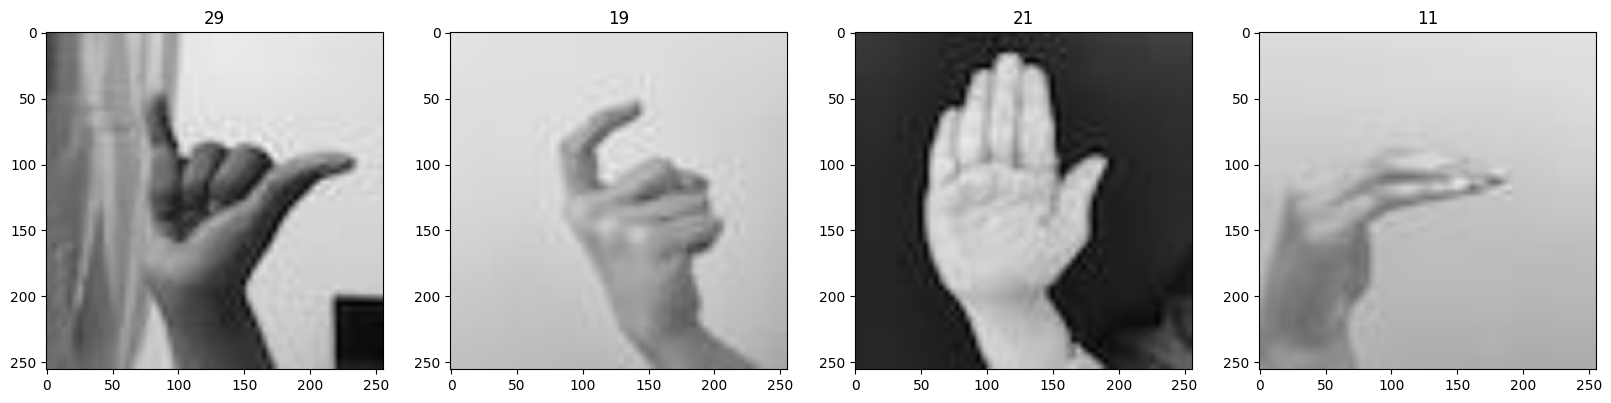

In [73]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

### Splitting Data

In [74]:
train_size = int(len(data) * 0.7)
test_size = int(len(data) * 0.2)
valid_size = int(len(data) * 0.1)

In [75]:
train =  data.take(train_size)
test = data.skip(train_size).take(test_size)
valid = data.skip(train_size+test_size).take(valid_size)

In [76]:
len(train)

1183

### Creating the CNN Model

In [77]:
# Defining the CNN

model = keras.models.Sequential()

model.add(keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(256, 256, 3)))
model.add(keras.layers.MaxPooling2D())

model.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D())

model.add(keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D())

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(32, activation='softmax'))

In [78]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 16)      

In [79]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [80]:
save_best_cb = keras.callbacks.ModelCheckpoint('models/best_model', save_best_only=True) # Saves the best model so far
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5) # Interupts training when there is no progress

#### Training

In [81]:
history = model.fit(train, epochs=20, validation_data=test, callbacks=[save_best_cb, early_stopping_cb])

Epoch 1/20
 733/1183 [=================>............] - ETA: 4:04 - loss: 1.6748 - accuracy: 0.5376

KeyboardInterrupt: 

In [58]:
history.history # Contains the training related information for each epoch

{'loss': [0.07527688145637512,
  0.054443515837192535,
  0.0448550209403038,
  0.04245747998356819,
  0.03676986321806908,
  0.03220997750759125,
  0.021628528833389282,
  0.030121278017759323],
 'accuracy': [0.9772559404373169,
  0.9833579659461975,
  0.9867656230926514,
  0.9873996376991272,
  0.9888789057731628,
  0.9905959367752075,
  0.9939771890640259,
  0.9907544255256653],
 'val_loss': [0.2236444354057312,
  0.22186128795146942,
  0.20073474943637848,
  0.2643011808395386,
  0.2515091300010681,
  0.24499323964118958,
  0.3252333402633667,
  0.20484121143817902],
 'val_accuracy': [0.9436020851135254,
  0.9445266127586365,
  0.9589496850967407,
  0.9496116638183594,
  0.9574704170227051,
  0.9534023404121399,
  0.9484097361564636,
  0.9595044255256653]}

#### Performance Plotting

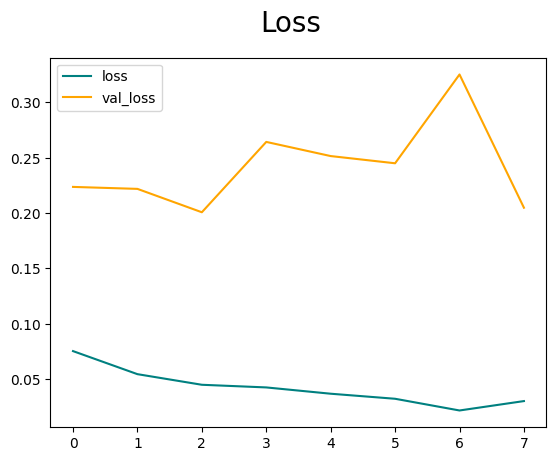

In [59]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

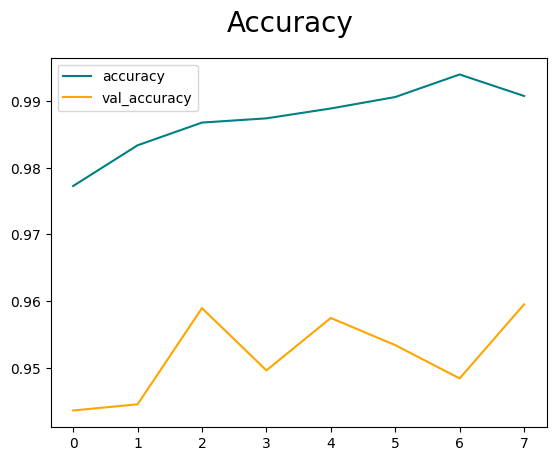

In [60]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

### Evaluate Performance

In [61]:
pre = Precision()
re = Recall()
acc = Accuracy()

In [64]:
for batch in valid.as_numpy_iterator():
  x, y = batch
  yhat = model.predict(x)
  # pre.update_state(y, yhat)
  # re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 [==============================] - 0s 33ms/step


ValueError: Shapes (32,) and (32, 32) are incompatible

In [ ]:
print(f'Precision: {pre.result().nupmy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

### Save Model

In [ ]:
# Saving the model
model.save('models/ArSLText.h5')

In [ ]:
ArSL_model = load_model('models/ArSLText.h5')

In [ ]:
# Loading Best Saved Model
# ArSL_model = load_model('models/best_model')

### Converting Images to Sentences

In [ ]:
# test -> Test Set

##### Making Arabic Letters Labels

In [ ]:
# encoded_labels = pd.DataFrame()

In [ ]:
#Classes Dictionary
# label = pd.read_csv('data\ArSL_Data_Labels.csv')

In [ ]:
# label.head(3)

,#,File_Name,Class
0,1,AIN (1).JPG,ain
1,2,AIN (10).JPG,ain
2,3,AIN (100).jpg,ain


In [ ]:
# encoded_labels['Phonteics'] = label['Class'].unique()

In [ ]:
# numbers  = [i for i in range(32)]

In [ ]:
# encoded_labels['Index'] = numbers

In [ ]:
# arab_list = list()

In [ ]:
# for eng_lab in  label['Class'].unique():
#   print('English Label: ', eng_lab)
#   arab_lab = input('Arabic Label: ')
#   arab_list.append(arab_lab)

In [ ]:
# encoded_labels['ِArabic_Letters'] = arab_list

In [ ]:
# encoded_labels.head(3)

,Phonteics,Index,ِArabic_Letters
0,ain,0,ع
1,al,1,ال
2,aleff,2,أ


In [ ]:
# encoded_labels.to_csv('data/Arabic_Letters_Guide.csv', index=False)

#### .........................................

In [ ]:
encoded_labels = pd.read_csv('data/Arabic_Letters_Guide.csv')
encoded_labels.head(3)

,Phonteics,Index,ِArabic_Letters
0,ain,0,ع
1,al,1,ال
2,aleff,2,أ


In [ ]:
# Actual_Word = 'لغة'
Predicted = ''

In [ ]:
test = tf.keras.utils.image_dataset_from_directory('/content/gdrive/MyDrive/mendeley-data/Test')

batch = test.as_numpy_iterator().next()
x, y = batch

predicted = ArSL_model.predict(x)

letter = encoded_labels[encoded_labels['Index'] == predicted]
arab_letter = letter['Arabic_Letters']

Predicted += arab_letter

In [ ]:
# value = ArSL_model.predict(data.random())
# phon = label_dict[value]
# arabicLetter = arab_dict[phon]

NameError: ignored

In [ ]:
arabicLetter